In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('C:\\Users\Snow\Downloads\Yeni klasör\profile_login_20181217_20190113.csv', encoding='utf-8-sig', engine='python')
df.sample(5)

,log_datetime,user_id,host_id,rank_id,rank_points,prestige,total_online_time,total_playtime,game_money,profile_create_time,client_version
449648,2019-01-04 18:31:06,180503624971,hunt_live01,100,101765,1,443779,263059,105,2018-06-03 09:56:52,1.4.0.515
1055051,2018-12-30 19:47:47,583648427922,hunt_live01,1,0,0,0,0,4000,2018-12-30 19:47:47,1.4.0.515
968148,2018-12-30 16:03:50,482812727846,hunt_live01,42,24870,0,106249,54059,7215,2018-10-30 16:02:07,1.4.0.515
914459,2018-12-27 06:08:24,182200806595,hunt_live01,100,103020,0,815741,203238,2814,2018-08-10 15:15:54,1.4.0.515
1097721,2019-01-03 21:10:57,984166585255,hunt_live01,4,1665,0,17447,9403,4037,2019-01-01 19:59:20,1.4.0.515


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185910 entries, 0 to 1185909
Data columns (total 11 columns):
log_datetime           1185910 non-null object
user_id                1185910 non-null int64
host_id                1185910 non-null object
rank_id                1185910 non-null int64
rank_points            1185910 non-null int64
prestige               1185910 non-null int64
total_online_time      1185910 non-null int64
total_playtime         1185910 non-null int64
game_money             1185910 non-null int64
profile_create_time    1185910 non-null object
client_version         1185910 non-null object
dtypes: int64(7), object(4)
memory usage: 99.5+ MB


In [5]:
df.describe()

,user_id,rank_id,rank_points,prestige,total_online_time,total_playtime,game_money
count,"1,185,910.00","1,185,910.00","1,185,910.00","1,185,910.00","1,185,910.00","1,185,910.00","1,185,910.00"
mean,"579,654,025,680.96",51.67,"43,847.09",1.20,"204,817.01","131,731.36","11,970.34"
std,"257,338,636,628.45",35.59,"37,841.27",3.36,"372,589.47","261,068.22","23,576.71"
min,"179,602,754,859.00",1.00,0.00,0.00,0.00,0.00,0.00
25%,"380,186,055,198.00",16.00,"7,605.00",0.00,"30,034.00","17,317.00","4,512.00"
50%,"580,681,552,879.00",50.00,"33,746.00",0.00,"99,951.00","61,148.00","7,474.00"
75%,"781,654,982,447.00",87.00,"80,540.00",1.00,"226,542.00","141,066.00","13,025.00"
max,"988,867,734,681.00",100.00,"107,795.00",50.00,"5,935,091.00","4,678,431.00","1,043,963.00"


In [6]:
df_categorical=df.select_dtypes(include=['object']).copy()
print(df_categorical.describe())

               log_datetime      host_id  profile_create_time client_version
count               1185910      1185910              1185910        1185910
unique               915615            2               141948              5
top     2018-12-30 16:02:14  hunt_live01  2018-02-23 01:24:02      1.4.0.515
freq                     20      1185688                  614         901230


In [7]:
c = df.host_id.value_counts(dropna=False)
p = df.host_id.value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
hunt_live01,1185688,99.98
hunt_stage01,222,0.02


In [8]:
#drop test server data
df_live=df[df.host_id != 'hunt_stage01']

In [9]:
c = df_live.client_version.value_counts(dropna=False)
p = df_live.client_version.value_counts(dropna=False, normalize=True)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
1.4.0.515,901162,0.76
1.4.0.518,170414,0.14
1.4.0.508,114112,0.10


In [10]:
pd.options.mode.chained_assignment = None  # default='warn'

In [11]:
#convert to object to datetime
df_live["profile_create_time"]=pd.to_datetime(df_live["profile_create_time"])
df_live["log_datetime"]=pd.to_datetime(df_live["log_datetime"])

In [12]:
#convert to datetime to date
df_live["log_date"]=df_live["log_datetime"].dt.date
df_live['profile_create_date'] = df_live['profile_create_time'].dt.strftime('%Y-%m-%d')
df_live.head()

,log_datetime,user_id,host_id,rank_id,rank_points,prestige,total_online_time,total_playtime,game_money,profile_create_time,client_version,log_date,profile_create_date
0,2019-01-07 19:12:40,579602659126,hunt_live01,96,94265,0,348156,226938,11641,2018-03-13 21:03:45,1.4.0.515,2019-01-07,2018-03-13
1,2019-01-08 14:10:29,579602659126,hunt_live01,96,94265,0,348542,226938,11433,2018-03-13 21:03:45,1.4.0.515,2019-01-08,2018-03-13
2,2019-01-10 16:39:09,579602659126,hunt_live01,96,94265,0,348562,226938,11433,2018-03-13 21:03:45,1.4.0.518,2019-01-10,2018-03-13
3,2019-01-12 19:57:17,579602659126,hunt_live01,97,96345,0,361358,234158,9845,2018-03-13 21:03:45,1.4.0.518,2019-01-12,2018-03-13
4,2019-01-13 05:06:26,979602665731,hunt_live01,22,10570,1,61389,19020,9581,2018-02-23 06:52:42,1.4.0.518,2019-01-13,2018-02-23


In [13]:
#select data has create date between Dec 17 and Jan 13
df_live1=df_live[df_live['profile_create_time']>='2018-12-17 00:00:00']
df_live1.head(5)

,log_datetime,user_id,host_id,rank_id,rank_points,prestige,total_online_time,total_playtime,game_money,profile_create_time,client_version,log_date,profile_create_date
154,2018-12-17 02:13:50,879602766403,hunt_live01,1,0,0,0,0,4000,2018-12-17 02:13:50,1.4.0.508,2018-12-17,2018-12-17
155,2018-12-18 06:06:06,879602766403,hunt_live01,2,260,0,1419,787,4075,2018-12-17 02:13:50,1.4.0.508,2018-12-18,2018-12-17
175,2018-12-25 17:33:28,579602799714,hunt_live01,1,0,0,0,0,4000,2018-12-25 17:33:28,1.4.0.515,2018-12-25,2018-12-25
327,2019-01-06 16:12:23,879602869732,hunt_live01,2,675,0,2716,1655,4075,2019-01-06 15:04:18,1.4.0.515,2019-01-06,2019-01-06
328,2019-01-06 17:11:24,879602869732,hunt_live01,3,810,0,3839,2418,4325,2019-01-06 15:04:18,1.4.0.515,2019-01-06,2019-01-06


In [14]:
grouped = df_live1.groupby(['profile_create_date','log_date'])
# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'user_id': pd.Series.nunique})
# make the column names more meaningful
cohorts.rename(columns={'user_id': 'TotalUsers'}, inplace=True)
cohorts.head(5)

TotalUsers
profile_create_date log_date              
2018-12-17          2018-12-17        2602
                    2018-12-18        1146
                    2018-12-19         773
                    2018-12-20         637
                    2018-12-21         535

In [15]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  CohortPeriod
profile_create_date log_date                            
2018-12-17          2018-12-17        2602             1
                    2018-12-18        1146             2
                    2018-12-19         773             3
                    2018-12-20         637             4
                    2018-12-21         535             5

In [16]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['profile_create_date', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

profile_create_date
2018-12-17    2602
2018-12-18    2565
2018-12-19    1968
2018-12-20    1255
2018-12-21    1832
Name: TotalUsers, dtype: int64

In [17]:
cohorts['TotalUsers'].head()

profile_create_date  CohortPeriod
2018-12-17           1               2602
                     2               1146
                     3                773
                     4                637
                     5                535
Name: TotalUsers, dtype: int64

In [18]:
cohorts['TotalUsers'].unstack(0).head()

profile_create_date,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,...,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,"2,602.00","2,565.00","1,968.00","1,255.00","1,832.00","2,023.00","1,890.00","1,591.00","2,017.00","2,169.00",...,999.00,805.00,750.00,543.00,477.00,482.00,465.00,485.00,622.00,620.00
2,"1,146.00","1,140.00",892.00,530.00,831.00,896.00,790.00,710.00,942.00,897.00,...,404.00,350.00,282.00,248.00,181.00,205.00,191.00,207.00,294.00,nan
3,773.00,807.00,598.00,370.00,597.00,509.00,553.00,543.00,626.00,663.00,...,291.00,207.00,177.00,153.00,144.00,138.00,132.00,136.00,nan,nan
4,637.00,628.00,474.00,288.00,400.00,430.00,460.00,407.00,497.00,524.00,...,222.00,172.00,155.00,125.00,111.00,117.00,116.00,nan,nan,nan
5,535.00,498.00,432.00,236.00,324.00,388.00,387.00,352.00,419.00,438.00,...,183.00,152.00,125.00,120.00,106.00,104.00,nan,nan,nan,nan


In [19]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

profile_create_date,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,...,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,0.44,0.44,0.45,0.42,0.45,0.44,0.42,0.45,0.47,0.41,...,0.40,0.43,0.38,0.46,0.38,0.43,0.41,0.43,0.47,nan
3,0.30,0.31,0.30,0.29,0.33,0.25,0.29,0.34,0.31,0.31,...,0.29,0.26,0.24,0.28,0.30,0.29,0.28,0.28,nan,nan
4,0.24,0.24,0.24,0.23,0.22,0.21,0.24,0.26,0.25,0.24,...,0.22,0.21,0.21,0.23,0.23,0.24,0.25,nan,nan,nan
5,0.21,0.19,0.22,0.19,0.18,0.19,0.20,0.22,0.21,0.20,...,0.18,0.19,0.17,0.22,0.22,0.22,nan,nan,nan,nan
6,0.17,0.17,0.17,0.15,0.18,0.17,0.19,0.19,0.18,0.16,...,0.16,0.15,0.16,0.23,0.19,nan,nan,nan,nan,nan
7,0.15,0.13,0.13,0.16,0.15,0.16,0.16,0.17,0.14,0.14,...,0.15,0.16,0.15,0.18,nan,nan,nan,nan,nan,nan
8,0.12,0.11,0.13,0.13,0.13,0.15,0.16,0.14,0.13,0.12,...,0.14,0.16,0.15,nan,nan,nan,nan,nan,nan,nan
9,0.11,0.12,0.11,0.11,0.14,0.14,0.12,0.11,0.12,0.11,...,0.14,0.13,nan,nan,nan,nan,nan,nan,nan,nan


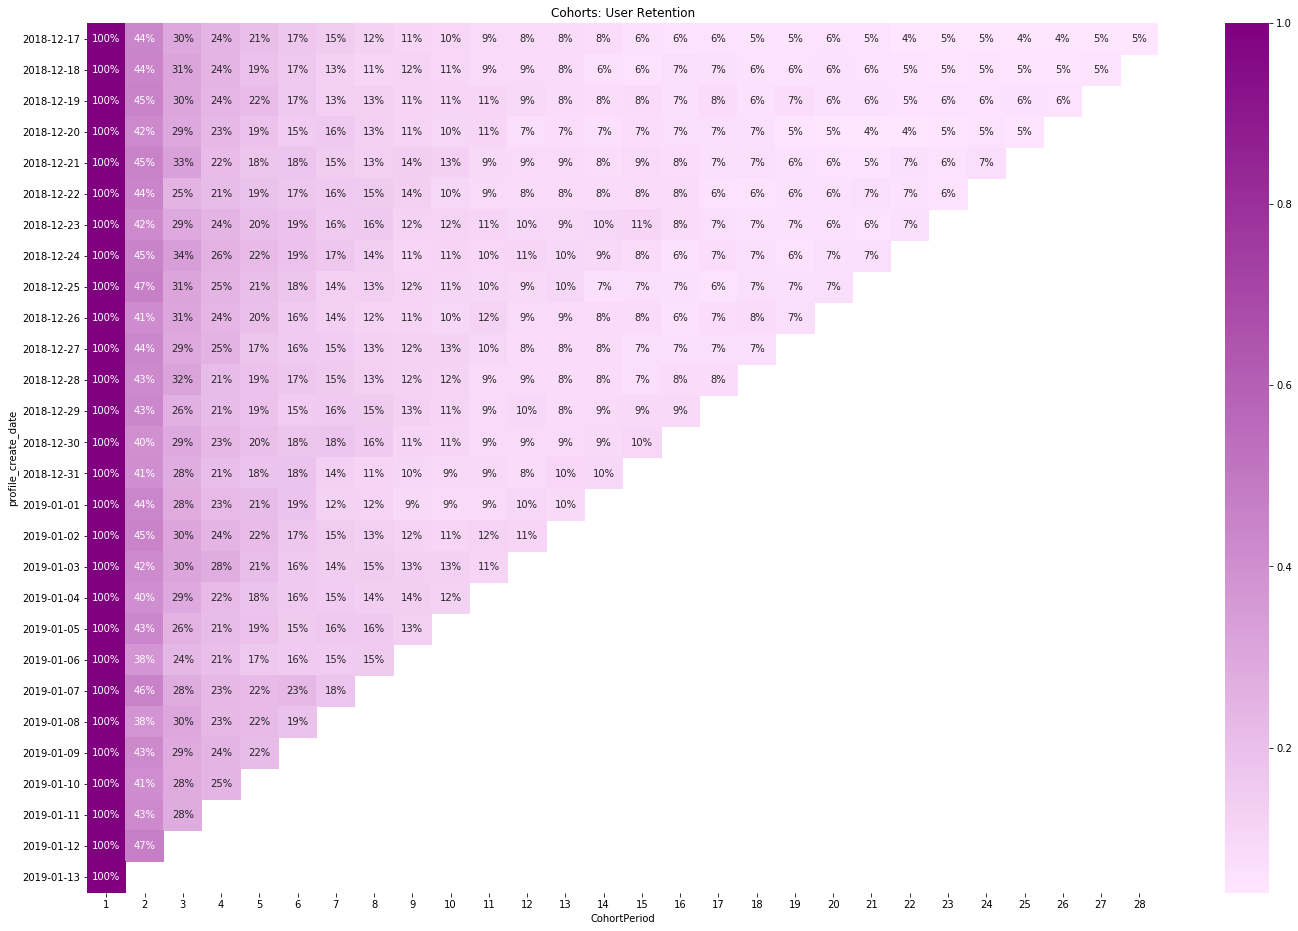

In [20]:
import seaborn as sns
colormap=sns.light_palette("purple",as_cmap=True, reverse=False)

plt.figure(figsize=(24,16))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%',cmap=colormap);